# Multinomial distribution

In [1]:
library(MCMCvis)
library(rjags)

Warning message:
"package 'MCMCvis' was built under R version 3.5.3"Warning message:
"package 'rjags' was built under R version 3.5.3"Loading required package: coda
Warning message:
"package 'coda' was built under R version 3.5.3"Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


## Generate samples from the multinomial distribution

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 1
   Total graph size: 5

Initializing model



,mean,sd,2.5%,50%,97.5%,Rhat
p[1],1.77,0.88,0,2,3,1
p[2],1.23,0.88,0,1,3,1


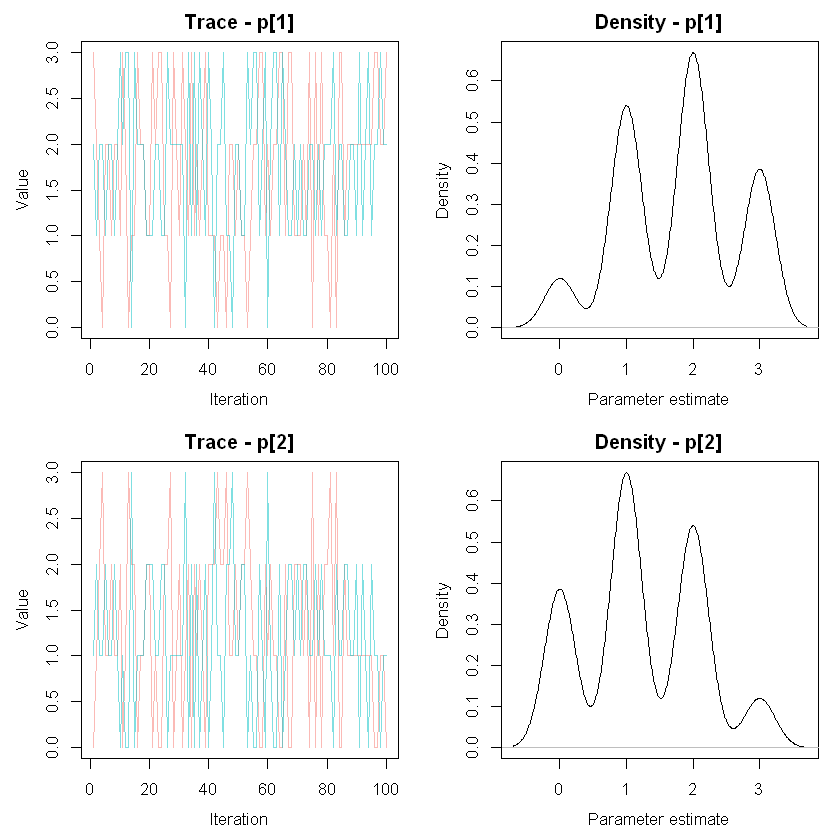

In [3]:
# Example of sampling from the Categorical distribution
model_string = "
model {
    p ~ dmulti(alpha, N)
}
"

model = jags.model(textConnection(model_string),
                   n.chains = 2,
                   data = list(alpha=c(0.6, 0.4), N=3))

samp = coda.samples(model, 
                    variable.names=c("p"), 
                    n.iter=100, progress.bar="none")

# Show a summary of the variables
MCMCsummary(samp, round = 2)

# Show plots
MCMCtrace(samp, pdf=FALSE)

In [4]:
samp

[[1]]
Markov Chain Monte Carlo (MCMC) output:
Start = 1 
End = 100 
Thinning interval = 1 
       p[1] p[2]
  [1,]    3    0
  [2,]    2    1
  [3,]    1    2
  [4,]    0    3
  [5,]    2    1
  [6,]    2    1
  [7,]    1    2
  [8,]    2    1
  [9,]    2    1
 [10,]    1    2
 [11,]    3    0
 [12,]    2    1
 [13,]    0    3
 [14,]    1    2
 [15,]    1    2
 [16,]    3    0
 [17,]    2    1
 [18,]    2    1
 [19,]    1    2
 [20,]    1    2
 [21,]    3    0
 [22,]    2    1
 [23,]    3    0
 [24,]    3    0
 [25,]    1    2
 [26,]    1    2
 [27,]    0    3
 [28,]    3    0
 [29,]    2    1
 [30,]    1    2
 [31,]    3    0
 [32,]    2    1
 [33,]    1    2
 [34,]    3    0
 [35,]    1    2
 [36,]    2    1
 [37,]    1    2
 [38,]    2    1
 [39,]    3    0
 [40,]    1    2
 [41,]    1    2
 [42,]    1    2
 [43,]    0    3
 [44,]    1    2
 [45,]    1    2
 [46,]    0    3
 [47,]    2    1
 [48,]    2    1
 [49,]    1    2
 [50,]    2    1
 [51,]    1    2
 [52,]    1    2
 [53,]  

## Infer parameters of a multinomial distribution

In [9]:
# Generate some values (three possible values)
p_initial = c(0.2, 0.6, 0.2)
p = rmultinom(1, 100, p_initial)
p

17
57
26


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 7

Initializing model



,mean,sd,2.5%,50%,97.5%,Rhat
alpha[1],0.18,0.04,0.11,0.18,0.26,1.03
alpha[2],0.56,0.05,0.47,0.56,0.66,1.00
alpha[3],0.26,0.05,0.17,0.26,0.36,1.07
"p[1,1]",17.00,0.00,17.00,17.00,17.00,NaN
"p[2,1]",57.00,0.00,57.00,57.00,57.00,NaN
"p[3,1]",26.00,0.00,26.00,26.00,26.00,NaN


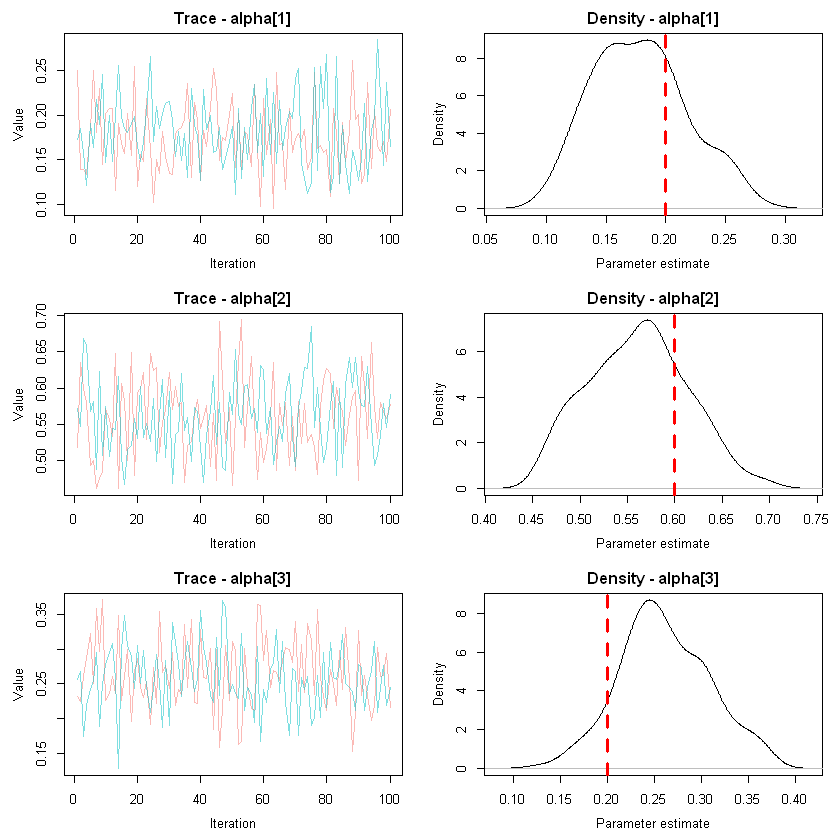

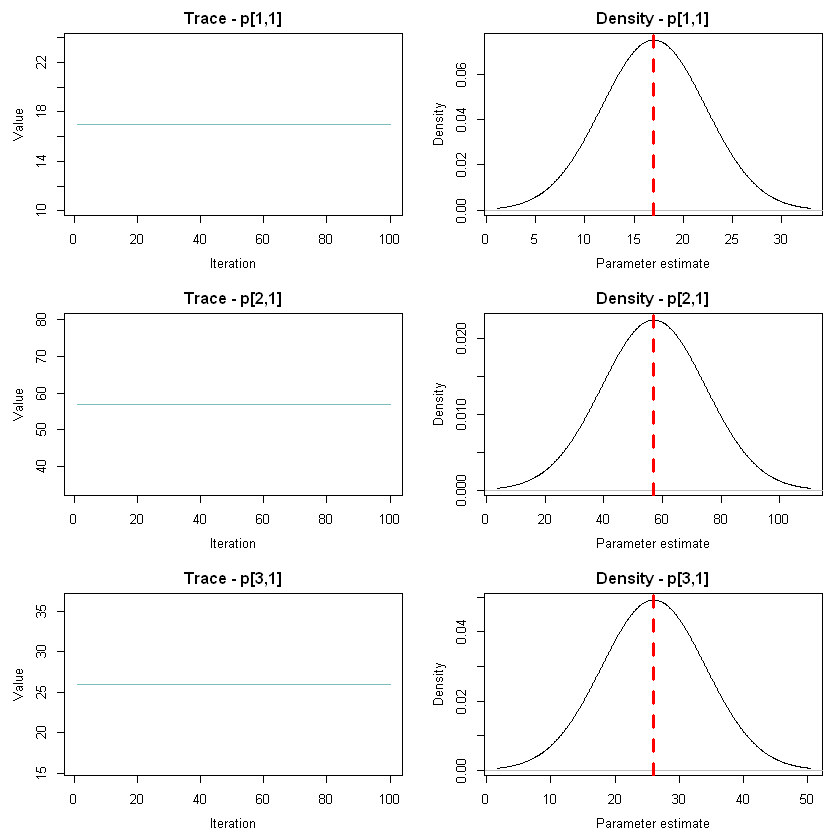

In [16]:
# Infer the parameters of the multinomial distribution
model_string = "
model {
    alpha ~ ddirch(theta)
    p ~ dmulti(alpha, N)
}
"

model = jags.model(textConnection(model_string),
                   n.chains = 2,
                   data = list(theta=c(1, 1, 1), N=100, p=p))

samp = coda.samples(model, 
                    variable.names=c("p", "alpha"), 
                    n.iter=100, progress.bar="none")

# Show a summary of the variables
MCMCsummary(samp, round = 2)

# Show plots
gv = c(0.2, 0.6, 0.2, p)
MCMCtrace(samp, 
          gv=gv,
          pdf=FALSE)